<a href="https://colab.research.google.com/github/DoctorVinay8097/DLprojects/blob/main/DL_Lab_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Training the LFW dataset using CNN for Face recognition**

## **Dataset**
* The Labeled Faces in the Wild (LFW) Dataset is a widely used benchmark dataset for face recognition and classification tasks in computer vision.
* The LFW dataset contains grayscale images of faces collected from the internet.
* The images in this dataset are of various individuals and represent a wide range of poses, lighting conditions, and expressions.
* The dataset includes more than 13,000 images of faces.
* These images belong to 5,749 individuals.
* Each individual in the dataset typically has multiple images taken under different conditions.



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam


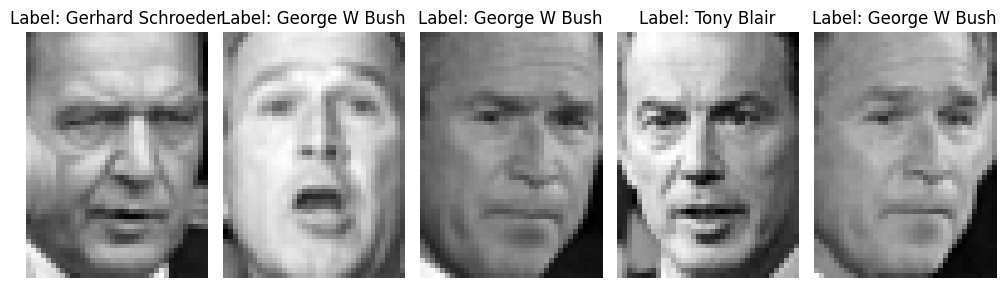

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people

# Load the LFW dataset
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

# Get the data (images) and target (labels)
X, y = lfw_people.images, lfw_people.target

# Randomly select and display a few images
num_images_to_display = 5
random_indices = np.random.randint(0, len(X), num_images_to_display)

plt.figure(figsize=(10, 5))

for i, index in enumerate(random_indices, 1):
    plt.subplot(1, num_images_to_display, i)
    plt.imshow(X[index], cmap='gray')
    plt.title(f'Label: {lfw_people.target_names[y[index]]}')
    plt.axis('off')

plt.tight_layout()
plt.show()

**min_faces_per_person:**

* This parameter determines the minimum number of face images per person (individual) that should be included in the loaded dataset.
* For example, if you set min_faces_per_person=70, the function will only include individuals who have at least 70 face images in the dataset.
* The purpose of this parameter is to filter out individuals with too few images, as they may not be suitable for tasks like face recognition where a sufficient number of samples per person is required.
* By specifying a higher value, you can ensure that the dataset contains individuals with a significant number of images, which is often important for robust model training.

**resize:**

* The resize parameter controls the resizing of the images in the dataset.
* By default, resize is set to None, meaning that the images are loaded in their original size.
* If you set resize to a float value between 0 and 1 (e.g., resize=0.5), it resizes the images by that factor. In this case, the images will be scaled down to 50% of their original size.

## **Step 1: Load and preprocess the data**

In [ ]:
# Load the LFW dataset
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

# Get the data (images) and target (labels)
X, y = lfw_people.images, lfw_people.target

# Normalize pixel values to a range between 0 and 1
X = X / 255.0

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## **Step 2: Encode the y-labels**

* **LabelEncoder** is a utility class in scikit-learn that is used to encode categorical labels (i.e., class labels) into numerical values. It essentially maps each unique label to a unique integer.

* When you call ***fit_transform*** on the LabelEncoder, it first learns the mapping between unique labels and integers (i.e., it "fits" the encoder to the data). It assigns a unique integer to each unique label present in the training data.

* The **transform method** is used to apply the encoding that was learned during the "fit" step.

In [ ]:
# Encode the labels using LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)


## **Step 3: Build the CNN model**

In [ ]:
model = Sequential()

# Convolutional Layer 1
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(X_train.shape[1], X_train.shape[2], 1)))
model.add(MaxPooling2D((2, 2)))

# Convolutional Layer 2
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Flatten the feature maps
model.add(Flatten())

# Fully Connected Layer 1
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

# Fully Connected Layer 2 (Output Layer)
model.add(Dense(len(np.unique(y_train_encoded)), activation='softmax'))


In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])


In [ ]:
history = model.fit(X_train, y_train_encoded, epochs=20, batch_size=32, validation_split=0.2)


Epoch 1/20
26/26 [==============================] - 4s 83ms/step - loss: 1.7899 - accuracy: 0.3786 - val_loss: 1.6801 - val_accuracy: 0.4029
Epoch 2/20
26/26 [==============================] - 2s 78ms/step - loss: 1.7496 - accuracy: 0.3968 - val_loss: 1.7088 - val_accuracy: 0.4029
Epoch 3/20
26/26 [==============================] - 3s 113ms/step - loss: 1.7362 - accuracy: 0.3981 - val_loss: 1.6828 - val_accuracy: 0.4029
Epoch 4/20
26/26 [==============================] - 2s 65ms/step - loss: 1.7488 - accuracy: 0.3981 - val_loss: 1.7090 - val_accuracy: 0.4029
Epoch 5/20
26/26 [==============================] - 2s 67ms/step - loss: 1.7452 - accuracy: 0.3981 - val_loss: 1.6974 - val_accuracy: 0.4029
Epoch 6/20
26/26 [==============================] - 2s 66ms/step - loss: 1.7316 - accuracy: 0.3981 - val_loss: 1.6718 - val_accuracy: 0.4029
Epoch 7/20
26/26 [==============================] - 2s 67ms/step - loss: 1.7333 - accuracy: 0.3981 - val_loss: 1.6673 - val_accuracy: 0.4029
Epoch 8/20
2

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test_encoded)
print(f'Test accuracy: {test_acc * 100:.2f}%')


9/9 [==============================] - 1s 63ms/step - loss: 1.6438 - accuracy: 0.4612
Test accuracy: 46.12%


In [ ]:
predictions = model.predict(X_test)


9/9 [==============================] - 1s 59ms/step


## **Build another CNN model with different layers and filter. Check the accuracy of the model**